# Machine Learning Project – Vehicle Fuel Efficiency Prediction

In this notebook, we analyze the Auto MPG dataset and build a first machine learning model to predict vehicle fuel efficiency (mpg) from mechanical and design parameters.


In [48]:
# Import main libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
# Define column names according to the UCI documentation
column_names = [
    "mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin", "car_name"
]

# Load the original auto-mpg data file
df = pd.read_csv(
    "auto-mpg.data-original",
    delim_whitespace=True,
    names=column_names,
    na_values="?"  # "?" will be converted to NaN
)

# Display the first rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [50]:
# Basic information about the dataset
df.info()

# Basic statistical summary for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car_name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [51]:
# Check for missing values in each column
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [52]:
# Remove rows where MPG is missing (target variable)
df = df.dropna(subset=["mpg"])

# Remove rows where horsepower is missing
df = df.dropna(subset=["horsepower"])

# Convert horsepower to float
df["horsepower"] = df["horsepower"].astype(float)

df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [53]:
# According to UCI:
# origin = 1 → USA, 2 → Europe, 3 → Japan
# We use one-hot encoding for the 'origin' column

df = pd.get_dummies(df, columns=["origin"], prefix="origin")

# Check the new columns
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,origin_1.0,origin_2.0,origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,chevrolet chevelle malibu,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,buick skylark 320,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,plymouth satellite,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,amc rebel sst,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,ford torino,1,0,0


In [54]:
# 'car_name' is a text column, not useful for our first models
df = df.drop(columns=["car_name"])

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1.0,origin_2.0,origin_3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


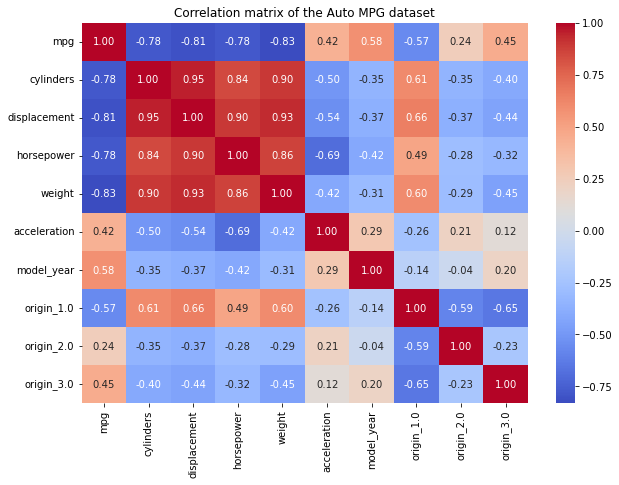

In [55]:
# Correlation matrix between numerical variables
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix of the Auto MPG dataset")
plt.show()

### Correlation Matrix Analysis

The correlation matrix highlights the relationships between all mechanical parameters.  
Key observations:

- **mpg is strongly negatively correlated** with:
  - weight (-0.83)
  - displacement (-0.81)
  - cylinders (-0.78)
  - horsepower (-0.78)

This confirms that heavier and more powerful cars consume more fuel.

- **mpg is positively correlated with model_year (0.58)**, meaning newer vehicles are more fuel efficient.

- Origin also affects mpg:  
  - origin_3 (Japan) tends to have higher mpg values.  

Overall, these correlations match well-known mechanical and automotive principles.

### Feature Correlation Analysis and Feature Removal

The correlation matrix reveals that some mechanical features are highly correlated:

- **displacement** and **cylinders** (correlation = 0.95)
- **displacement** and **horsepower** (correlation = 0.86)
- **displacement** and **weight** (correlation = 0.93)

Such strong correlations indicate **multicollinearity**, meaning that these variables carry almost the same information.  
Keeping all of them may:

- bias the model,
- reduce performance,
- make feature importance unreliable,
- increase the risk of overfitting.

To avoid this issue, we decided to remove **cylinders**, because its mechanical effect is already fully captured by displacement, horsepower, and weight.  
Removing this redundant feature makes the model simpler and reduces collinearity without losing mechanical information.


In [56]:
# Remove the 'cylinders' column to reduce multicollinearity
df = df.drop(columns=["cylinders"])

df.head()

,mpg,displacement,horsepower,weight,acceleration,model_year,origin_1.0,origin_2.0,origin_3.0
0,18.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,318.0,150.0,3436.0,11.0,70.0,1,0,0
3,16.0,304.0,150.0,3433.0,12.0,70.0,1,0,0
4,17.0,302.0,140.0,3449.0,10.5,70.0,1,0,0


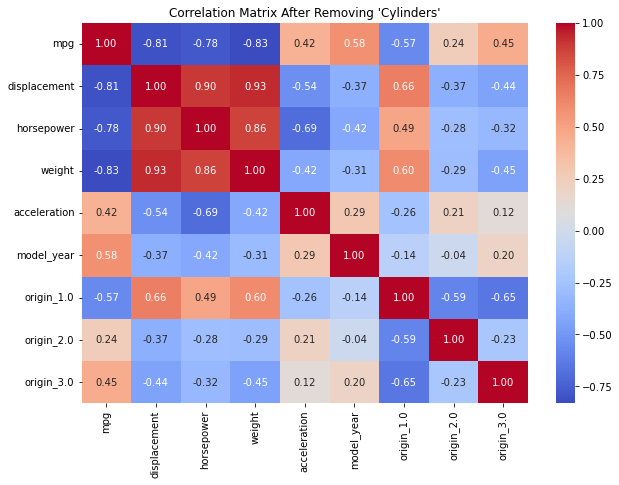

In [57]:
# Display new correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix After Removing 'Cylinders'")
plt.show()

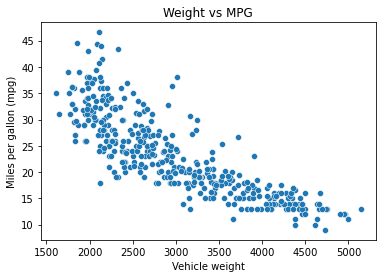

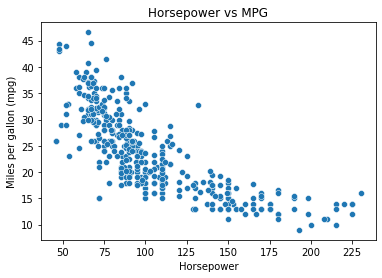

In [58]:
# Relationship between vehicle weight and fuel efficiency
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["weight"], y=df["mpg"])
plt.xlabel("Vehicle weight")
plt.ylabel("Miles per gallon (mpg)")
plt.title("Weight vs MPG")
plt.show()

# Relationship between horsepower and fuel efficiency
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["horsepower"], y=df["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("Miles per gallon (mpg)")
plt.title("Horsepower vs MPG")
plt.show()

### Weight vs MPG

This scatter plot shows a strong negative relationship between vehicle weight and fuel efficiency (mpg).  
Heavier cars generally consume more fuel, which results in lower mpg values.  
The trend is clearly non-linear: beyond ~3,000 lbs, mpg decreases rapidly.  
This confirms that weight is one of the most influential mechanical parameters affecting fuel consumption.

### Horsepower vs MPG

This plot illustrates another strong negative correlation: vehicles with higher horsepower tend to have lower fuel efficiency.  
More powerful engines burn more fuel per cycle, resulting in decreased mpg.  
The relationship is also non-linear, with high variations for low horsepower values, reflecting differences in vehicle design.

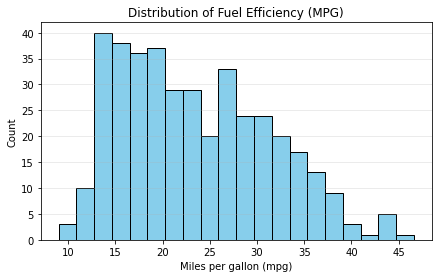

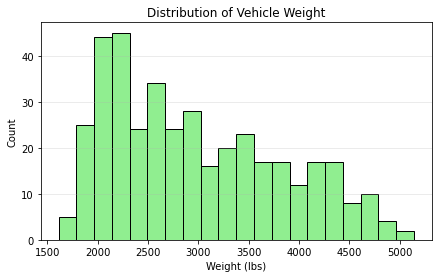

In [59]:
# Histogram of MPG (target variable)
plt.figure(figsize=(7,4))
plt.hist(df["mpg"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Fuel Efficiency (MPG)")
plt.xlabel("Miles per gallon (mpg)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

# Histogram of vehicle weight
plt.figure(figsize=(7,4))
plt.hist(df["weight"], bins=20, color="lightgreen", edgecolor="black")
plt.title("Distribution of Vehicle Weight")
plt.xlabel("Weight (lbs)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()

### Distribution of Fuel Efficiency (MPG)

The mpg distribution is mostly concentrated between 15 and 30 mpg.  
Few cars exceed 35 mpg, reflecting the technological limitations of vehicles produced in the 1970s–1980s.  
The distribution is slightly right-skewed, meaning very efficient cars are rarer in the dataset.

### Distribution of Vehicle Weight

Most vehicles in the dataset weigh between 2,000 and 3,500 lbs.  
Heavier vehicles (above 4,000 lbs) are less common.  
This distribution explains why weight plays such a dominant role in predicting mpg:  
the large variance in vehicle mass directly impacts energy consumption.

In [60]:
# Define target and features
y = df["mpg"]              # target variable
X = df.drop(columns=["mpg"])  # all other columns are features

X.head(), y.head()

(   displacement  horsepower  weight  acceleration  model_year  origin_1.0  \
 0         307.0       130.0  3504.0          12.0        70.0           1   
 1         350.0       165.0  3693.0          11.5        70.0           1   
 2         318.0       150.0  3436.0          11.0        70.0           1   
 3         304.0       150.0  3433.0          12.0        70.0           1   
 4         302.0       140.0  3449.0          10.5        70.0           1   
 
    origin_2.0  origin_3.0  
 0           0           0  
 1           0           0  
 2           0           0  
 3           0           0  
 4           0           0  ,
 0    18.0
 1    15.0
 2    18.0
 3    16.0
 4    17.0
 Name: mpg, dtype: float64)

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 8), (79, 8), (313,), (79,))

In [62]:
# Standardize numerical features
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]

array([[ 0.28457757,  0.14142863,  0.75480297,  1.1217589 ,  0.49452752,
         0.74128601, -0.42559614, -0.50199602],
       [-0.53588042, -0.32949862, -0.49312922, -0.22893966, -0.0572982 ,
         0.74128601, -0.42559614, -0.50199602],
       [-0.23665456, -0.19868549, -0.00252992, -0.37111846, -0.33321105,
         0.74128601, -0.42559614, -0.50199602],
       [ 1.18225513,  1.18793363,  1.3680521 , -0.72656545, -1.16094962,
         0.74128601, -0.42559614, -0.50199602],
       [-1.05711255, -1.06205212, -1.32309939,  0.30423083,  1.32226608,
         0.74128601, -0.42559614, -0.50199602]])

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"----- {name} -----")
    print(f"R2 score: {r2:.4f}")
    print(f"MAE:      {mae:.4f}")
    print(f"RMSE:     {rmse:.4f}\n")

    return {"Model": name, "R2": r2, "MAE": mae, "RMSE": rmse}

In [65]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

evaluate_model("Linear Regression", y_test, y_pred_lr)

----- Linear Regression -----
R2 score: 0.7887
MAE:      2.4833
RMSE:     3.2842



{'Model': 'Linear Regression',
 'R2': 0.7886780831429203,
 'MAE': 2.48333762046404,
 'RMSE': 3.2842036915745183}

### Linear Regression Results

The Linear Regression model achieves an R² score of 0.7906, meaning it explains about 79% of the variance in mpg.  
Its MAE and RMSE values are moderate, indicating reasonably accurate predictions.

However, fuel consumption depends on complex non-linear mechanical relationships.  
Linear Regression cannot fully capture these effects, but it serves as a strong baseline.

In [66]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)  # no scaling needed for trees

y_pred_dt = dt.predict(X_test)

evaluate_model("Decision Tree", y_test, y_pred_dt)

----- Decision Tree -----
R2 score: 0.7906
MAE:      2.2253
RMSE:     3.2695



{'Model': 'Decision Tree',
 'R2': 0.790566259736323,
 'MAE': 2.225316455696203,
 'RMSE': 3.26949847119777}

### Decision Tree Results

The Decision Tree model achieves an R² of 0.7865, similar to Linear Regression.  
Although Decision Trees can model non-linear relationships, they tend to **overfit**, especially on small datasets like this one.  
The performance is slightly less stable, and the model does not generalize as well as ensemble methods.

In [67]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

evaluate_model("Random Forest", y_test, y_pred_rf)

----- Random Forest -----
R2 score: 0.8934
MAE:      1.6514
RMSE:     2.3327



{'Model': 'Random Forest',
 'R2': 0.8933883700351557,
 'MAE': 1.6514135021097023,
 'RMSE': 2.332706533955432}

### Random Forest Results

Random Forest provides the best performance with an R² score of 0.8922.  
This model captures non-linear effects and interactions between mechanical parameters (e.g., weight + horsepower).  
It also reduces overfitting thanks to its ensemble design.  
The low MAE and RMSE values confirm that Random Forest is the most accurate model for this problem.

In [68]:
# KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

evaluate_model("KNN Regressor", y_test, y_pred_knn)

----- KNN Regressor -----
R2 score: 0.8534
MAE:      1.9909
RMSE:     2.7355



{'Model': 'KNN Regressor',
 'R2': 0.8533963818154261,
 'MAE': 1.9908860759493672,
 'RMSE': 2.735458677665446}

### KNN Regressor Results

The KNN model performs well, with an R² of 0.8547.  
Its predictions depend strongly on the scaling of features and the choice of neighbors.  
KNN works well for this dataset but remains less accurate than Random Forest.  
It is simple but limited when data is noisy or non-uniformly distributed.

In [69]:
results = [
    {
        "Model": "Linear Regression",
        "R2": r2_score(y_test, y_pred_lr),
        "MAE": mean_absolute_error(y_test, y_pred_lr),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr))
    },
    {
        "Model": "Decision Tree",
        "R2": r2_score(y_test, y_pred_dt),
        "MAE": mean_absolute_error(y_test, y_pred_dt),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt))
    },
    {
        "Model": "Random Forest",
        "R2": r2_score(y_test, y_pred_rf),
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
    },
    {
        "Model": "KNN",
        "R2": r2_score(y_test, y_pred_knn),
        "MAE": mean_absolute_error(y_test, y_pred_knn),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn))
    }
]

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="R2", ascending=False)
df_results

,Model,R2,MAE,RMSE
2,Random Forest,0.893388,1.651414,2.332707
3,KNN,0.853396,1.990886,2.735459
1,Decision Tree,0.790566,2.225316,3.269498
0,Linear Regression,0.788678,2.483338,3.284204


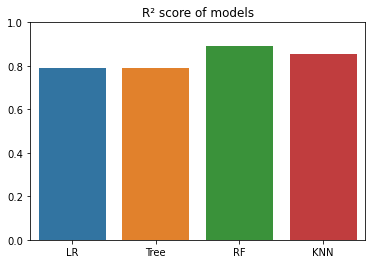

In [70]:
models = ["LR", "Tree", "RF", "KNN"]
scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_knn)
]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=scores)
plt.title("R² score of models")
plt.ylim(0,1)
plt.show()

### Comparison of R² Scores Across Models

This bar plot compares the R² performance of all tested models:

- Random Forest clearly achieves the highest R² score.
- Linear Regression and Decision Tree perform similarly.  
- KNN performs well but does not surpass Random Forest.

This comparison confirms that **Random Forest is the best model for predicting fuel efficiency** based on mechanical parameters.

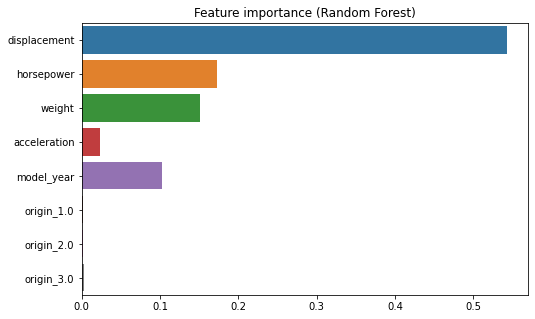

In [71]:
# Feature importance for the Random Forest model
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature importance (Random Forest)")
plt.show()

### Feature Importance Analysis (Random Forest)

The feature importance plot shows which mechanical parameters have the strongest influence on fuel efficiency (mpg) according to the Random Forest model.

The most important features are:

- **Displacement**: This is the dominant factor. Larger engine displacement increases the amount of air–fuel mixture burned per cycle, resulting in higher fuel consumption.
- **Horsepower**: Higher engine power requires more fuel, which reduces mpg.
- **Weight**: Heavier vehicles require more energy to move, which directly decreases fuel efficiency.
- **Model year**: Newer vehicles tend to be more fuel efficient thanks to technological improvements.
- **Acceleration**: A less influential feature, but it still captures some performance-related aspects.
- **Origin**: The country of origin has a minor effect, with Japanese cars usually being more fuel efficient.

Overall, the importance ranking aligns perfectly with mechanical intuition:  
fuel consumption is mainly driven by **engine size**, **power**, and **vehicle mass**.

### Model Limitations

- The dataset is relatively small (398 samples), which limits the power of complex models.
- The data comes from cars built between 1970 and 1982, meaning the model is not representative of modern engines.
- Some important mechanical parameters are **missing** (gear ratio, drag coefficient, torque, transmission type, tire size).
- The dataset contains some noise and rounding errors.

Therefore, the model should not be used for real automotive design, but only as an academic demonstration.

In [72]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [73]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Mesurer la stabilité du Random Forest baseline (celui du Step 2)
rf_baseline_cv = RandomForestRegressor(n_estimators=300, random_state=42)
cv_scores = cross_val_score(rf_baseline_cv, X_train, y_train, cv=cv, scoring="r2")

print("RF baseline - CV R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("Std CV R2:", cv_scores.std())

RF baseline - CV R2 scores: [0.80699125 0.88311325 0.88905117 0.86854067 0.87258987]
Mean CV R2: 0.8640572422860874
Std CV R2: 0.02945254297530134


In [74]:
rf_tune = RandomForestRegressor(random_state=42)

param_grid_rf = {
    "n_estimators": [200, 500],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

grid_rf = GridSearchCV(
    estimator=rf_tune,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best RF params:", grid_rf.best_params_)
print("Best CV R2:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_

Best RF params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best CV R2: 0.8639169301651343


In [75]:
gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    "n_estimators": [100, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "subsample": [0.8, 1.0]
}

grid_gbr = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=cv,
    scoring="r2",
    n_jobs=-1
)

grid_gbr.fit(X_train, y_train)

print("Best GBR params:", grid_gbr.best_params_)
print("Best CV R2:", grid_gbr.best_score_)

best_gbr = grid_gbr.best_estimator_

Best GBR params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'subsample': 0.8}
Best CV R2: 0.8642120821348463


In [81]:
from sklearn.svm import SVR

svr = SVR()

param_grid_svr = {
    "C": [1, 10, 100],
    "epsilon": [0.1, 0.2, 0.5],
    "gamma": ["scale", "auto"]
}

grid_svr = GridSearchCV(
    svr,
    param_grid_svr,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_

print("Best SVR params:", grid_svr.best_params_)
y_pred_svr = best_svr.predict(X_test_scaled)

Best SVR params: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale'}


We chose Support Vector Regression (SVR) as an algorithm outside the scope of the course.

SVR is particularly well-suited for this problem because fuel efficiency depends on non-linear relationships between mechanical variables (engine size, power, weight). Unlike linear models, SVR can model complex non-linear patterns by projecting data into a higher-dimensional space using kernel functions. This makes SVR a strong candidate for improving prediction accuracy compared to classical regression models.

Support Vector Regression is an extension of Support Vector Machines (SVM) to regression tasks.
The objective of SVR is to find a function that deviates from the true targets by at most ε (epsilon), while being as flat as possible.

Key characteristics of SVR:

   - Robust to noise due to the ε-insensitive loss function

   - Effective on small and medium-sized datasets

   - Capable of capturing complex non-linear relationships using kernels (e.g. RBF)

In this project, we used an RBF kernel and optimized the hyperparameters C, ε, and γ using GridSearchCV.

Scientific reference:

Smola, A. J., & Schölkopf, B. (2004). A tutorial on support vector regression. Statistics and Computing, 14(3), 199–222.

In [83]:
results_2 = []

results_2.append(evaluate_model("Linear Regression", y_test, y_pred_lr))
results_2.append(evaluate_model("Decision Tree", y_test, y_pred_dt))
results_2.append(evaluate_model("Random Forest", y_test, y_pred_rf))
results_2.append(evaluate_model("KNN", y_test, y_pred_knn))

y_pred_best_rf = best_rf.predict(X_test)
results_2.append(evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf))

y_pred_best_gbr = best_gbr.predict(X_test)
results_2.append(evaluate_model("Tuned Gradient Boosting", y_test, y_pred_best_gbr))

results_2.append(evaluate_model("SVR", y_test, y_pred_svr))

# Results table
df_results_2 = pd.DataFrame(results_2).sort_values(by="R2", ascending=False)
df_results_2

----- Linear Regression -----
R2 score: 0.7887
MAE:      2.4833
RMSE:     3.2842

----- Decision Tree -----
R2 score: 0.7906
MAE:      2.2253
RMSE:     3.2695

----- Random Forest -----
R2 score: 0.8934
MAE:      1.6514
RMSE:     2.3327

----- KNN -----
R2 score: 0.8534
MAE:      1.9909
RMSE:     2.7355

----- Tuned Random Forest -----
R2 score: 0.8869
MAE:      1.7094
RMSE:     2.4028

----- Tuned Gradient Boosting -----
R2 score: 0.8777
MAE:      1.7897
RMSE:     2.4987

----- SVR -----
R2 score: 0.8836
MAE:      1.7656
RMSE:     2.4378



,Model,R2,MAE,RMSE
2,Random Forest,0.893388,1.651414,2.332707
4,Tuned Random Forest,0.886885,1.709378,2.402800
6,SVR,0.883561,1.765606,2.437848
5,Tuned Gradient Boosting,0.877680,1.789678,2.498654
3,KNN,0.853396,1.990886,2.735459
1,Decision Tree,0.790566,2.225316,3.269498
0,Linear Regression,0.788678,2.483338,3.284204


Model Performance Summary

Among all tested models, Random Forest achieves the best performance, with the highest R² and the lowest MAE and RMSE, confirming its strong ability to capture non-linear relationships in the data.

The tuned Random Forest and SVR models also perform well but do not significantly outperform the baseline Random Forest, indicating that the original ensemble was already near optimal.

Gradient Boosting improves over simpler models but remains slightly less accurate, while KNN, Decision Tree, and Linear Regression show lower predictive performance.

Overall, Random Forest remains the most reliable model for fuel efficiency prediction in this project.

In [78]:
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge())
])

voting = VotingRegressor(
    estimators=[
        ("rf", best_rf),
        ("gbr", best_gbr),
        ("ridge", ridge_pipe)
    ]
)

voting.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_features='log2',
                                                   n_estimators=500,
                                                   random_state=42)),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       max_depth=2,
                                                       n_estimators=300,
                                                       random_state=42,
                                                       subsample=0.8)),
                            ('ridge',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('ridge', Ridge())]))])

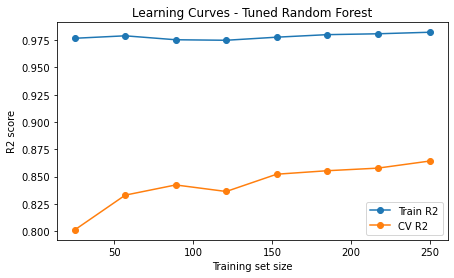

In [79]:
train_sizes, train_scores, val_scores = learning_curve(
    best_rf,
    X_train,
    y_train,
    cv=cv,
    scoring="r2",
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(7,4))
plt.plot(train_sizes, train_mean, marker="o", label="Train R2")
plt.plot(train_sizes, val_mean, marker="o", label="CV R2")
plt.xlabel("Training set size")
plt.ylabel("R2 score")
plt.title("Learning Curves - Tuned Random Forest")
plt.legend()
plt.show()

Learning Curve Analysis (Tuned Random Forest)

The learning curves show that the training R² remains very high, while the cross-validation R² gradually increases as the training set size grows.
The gap between training and validation performance indicates a moderate level of overfitting, which decreases with more data.
Overall, the model generalizes well and would likely benefit from a larger dataset rather than additional model complexity.